In [1]:
# Import the Pandas library
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('NY-House-Dataset.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

In [2]:
# Summary statistics for numerical variables
print(df.describe())

              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4.801000e+03  4801.000000  4801.000000   4801.000000  4801.000000   
mean   2.356940e+06     3.356801     2.373861   2184.207862    40.714227   
std    3.135525e+07     2.602315     1.946962   2377.140894     0.087676   
min    2.494000e+03     1.000000     0.000000    230.000000    40.499546   
25%    4.990000e+05     2.000000     1.000000   1200.000000    40.639375   
50%    8.250000e+05     3.000000     2.000000   2184.207862    40.726749   
75%    1.495000e+06     4.000000     3.000000   2184.207862    40.771923   
max    2.147484e+09    50.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


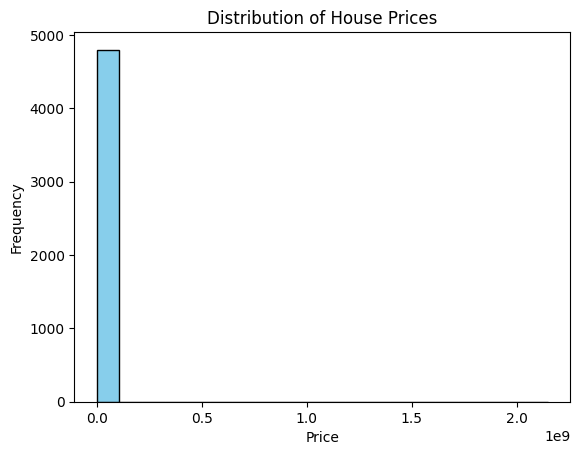

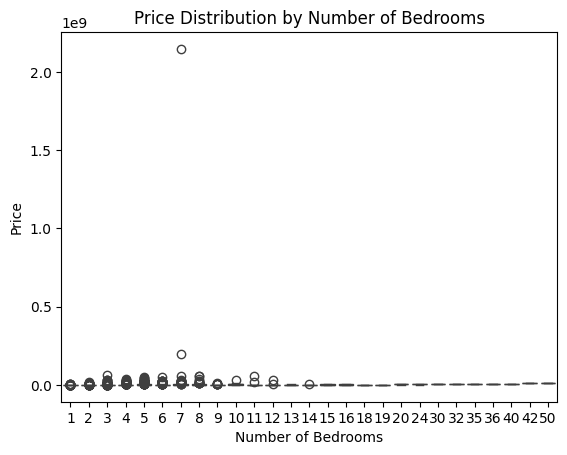

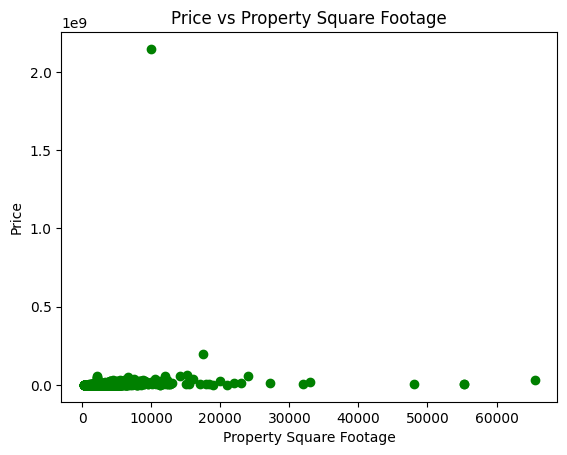

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.hist(df['PRICE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

# Boxplot
sns.boxplot(x='BEDS', y='PRICE', data=df)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Bedrooms')
plt.show()

# Scatter plot
plt.scatter(df['PROPERTYSQFT'], df['PRICE'], color='green')
plt.xlabel('Property Square Footage')
plt.ylabel('Price')
plt.title('Price vs Property Square Footage')
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())

# If there are missing values, you can handle them by imputation or removal
# For example, to impute missing values in PRICE column with the mean:
mean_price = df['PRICE'].mean()
df['PRICE'].fillna(mean_price, inplace=True)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


C:\Users\dhano\AppData\Local\Temp\ipykernel_19556\3832155491.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PRICE'].fillna(mean_price, inplace=True)


TYPE
Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: count, dtype: int64


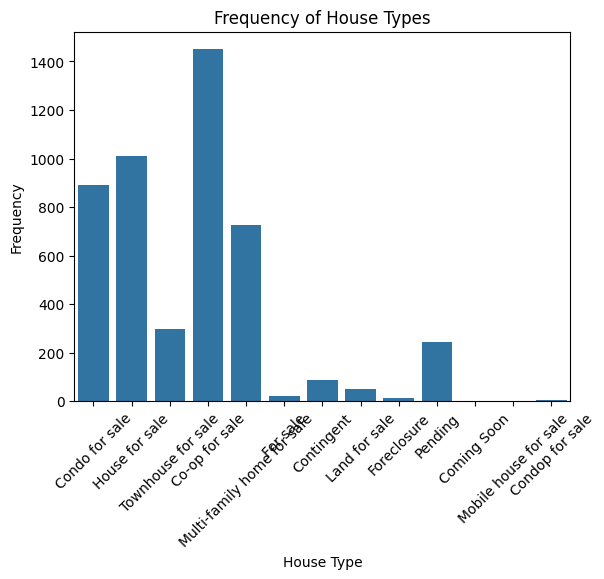

In [6]:
# Frequency table for house types
print(df['TYPE'].value_counts())

# Bar plot for house types
sns.countplot(x='TYPE', data=df)
plt.xlabel('House Type')
plt.ylabel('Frequency')
plt.title('Frequency of House Types')
plt.xticks(rotation=45)
plt.show()

                 PRICE      BEDS      BATH  PROPERTYSQFT  LATITUDE  LONGITUDE
PRICE         1.000000  0.052189  0.079371      0.110889 -0.020392  -0.054273
BEDS          0.052189  1.000000  0.776447      0.420503 -0.060933  -0.004529
BATH          0.079371  0.776447  1.000000      0.483935 -0.052235  -0.070892
PROPERTYSQFT  0.110889  0.420503  0.483935      1.000000  0.023413  -0.037308
LATITUDE     -0.020392 -0.060933 -0.052235      0.023413  1.000000   0.513969
LONGITUDE    -0.054273 -0.004529 -0.070892     -0.037308  0.513969   1.000000


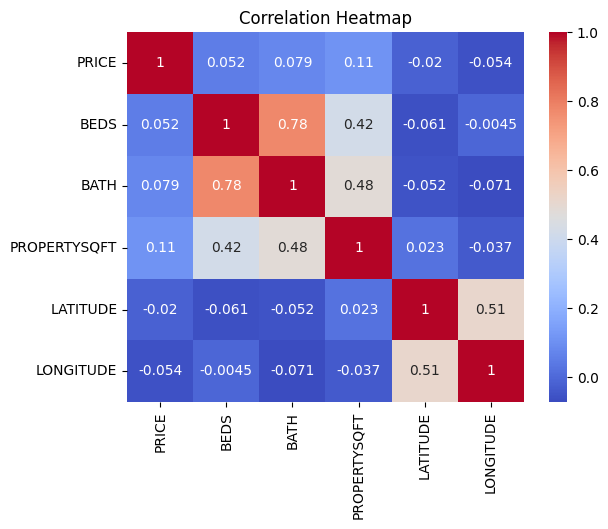

In [8]:
# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()
print(corr_matrix)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Concatenate training and testing data for one-hot encoding
X_combined = pd.concat([X_train, X_test], axis=0)

# Perform one-hot encoding on combined data
X_combined_encoded = pd.get_dummies(X_combined, columns=non_numeric_cols)

# Split back into training and testing sets
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Machine': SVR()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_encoded, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_encoded)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse}')

Linear Regression - Mean Squared Error: 33881318065563.797
Decision Tree - Mean Squared Error: 12775377122467.22
Random Forest - Mean Squared Error: 10179939690173.266
Support Vector Machine - Mean Squared Error: 26419915151483.484


In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate each trained model
for name, model in models.items():
    # Make predictions on the testing data
    y_pred = model.predict(X_test_encoded)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE using NumPy
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f'{name}:')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print('---')

Linear Regression:
Mean Squared Error: 33881318065563.797
Root Mean Squared Error: 5820766.1064127805
Mean Absolute Error: 2688471.9041762645
R-squared: -0.34477240827092426
---
Decision Tree:
Mean Squared Error: 12775377122467.22
Root Mean Squared Error: 3574265.9557547225
Mean Absolute Error: 857080.0884495317
R-squared: 0.49293664944484994
---
Random Forest:
Mean Squared Error: 10179939690173.266
Root Mean Squared Error: 3190601.7755547725
Mean Absolute Error: 737621.0506035379
R-squared: 0.5959513149188558
---
Support Vector Machine:
Mean Squared Error: 26419915151483.484
Root Mean Squared Error: 5140030.65666767
Mean Absolute Error: 1475685.4371978345
R-squared: -0.04862428479972758
---


In [16]:
import matplotlib.pyplot as plt

# Choose a model to visualize (e.g., Linear Regression)
model_name = 'Linear Regression'

# Get predicted values for the chosen model
y_pred_model = y_pred[model_name].flatten()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_model, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted Values ({model_name})')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [3]:
import pandas as pd

# Read the dataset into a DataFrame
df = pd.read_csv('NY-House-Dataset.csv')

# Filter the DataFrame based on the specified conditions
filtered_df = df[(df['LOCALITY'] == 'New York County') & (df['BEDS'] == 2)]

# Display the filtered DataFrame
filtered_df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
63,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1900000,2,2.0,1029.000000,150 Rivington St Apt 3G,"New York, NY 10002","150 Rivington St Apt 3GNew York, NY 10002",New York,New York County,New York,Manhattan,150,"150 Rivington St #3g, New York, NY 10002, USA",40.719341,-73.985644
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.0,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.0,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
107,Brokered by Avenues - Headquarters,Condo for sale,325000,2,1.0,979.000000,122 E 102nd St Apt 5B,"New York, NY 10029","122 E 102nd St Apt 5BNew York, NY 10029",New York,New York County,New York,Manhattan,122,"122 E 102nd St #5b, New York, NY 10029, USA",40.789751,-73.948726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,Brokered by COMPASS,Co-op for sale,899000,2,1.0,940.000000,401 E 74th St Apt 12M,"Manhattan, NY 10021","401 E 74th St Apt 12MManhattan, NY 10021",New York,New York County,New York,Manhattan,401,"401 E 74th St Apartment 12p, New York, NY 1002...",40.769187,-73.954480
4749,Brokered by COMPASS,Co-op for sale,1950000,2,2.0,1350.000000,246 W End Ave Apt 6A,"Manhattan, NY 10023","246 W End Ave Apt 6AManhattan, NY 10023",New York,New York County,New York,Manhattan,246,"246 West End Ave Apt 6e, New York, NY 10023, USA",40.779049,-73.984824
4750,Brokered by Corcoran East Side,Co-op for sale,740000,2,2.0,800.000000,609 Columbus Ave Apt 14C,"New York, NY 10024","609 Columbus Ave Apt 14CNew York, NY 10024",New York,New York County,New York,Manhattan,609,"609 Columbus Ave #14c, New York, NY 10024, USA",40.788708,-73.970009
4793,Brokered by Engel & V�������,Co-op for sale,1950000,2,4.0,2184.207862,700 Park Ave Unit 20A,"New York, NY 10021","700 Park Ave Unit 20ANew York, NY 10021",New York,New York County,New York,Manhattan,700,"700 Park Ave #20a, New York, NY 10021, USA",40.769478,-73.965389


In [6]:
# Specify the path where you want to save the Excel file
excel_file_path = r'C:\Users\dhano\OneDrive\Desktop\Work\Assignments\BUAN 6340(S24)\filtered_data.xlsx'


# Export the filtered DataFrame to an Excel file
filtered_df.to_excel(excel_file_path, index=False)

# Print a message to confirm the export
print(f"Filtered data has been exported to '{excel_file_path}'")


Filtered data has been exported to 'C:\Users\dhano\OneDrive\Desktop\Work\Assignments\BUAN 6340(S24)\filtered_data.xlsx'



Top Broker Titles by Number of Listings:


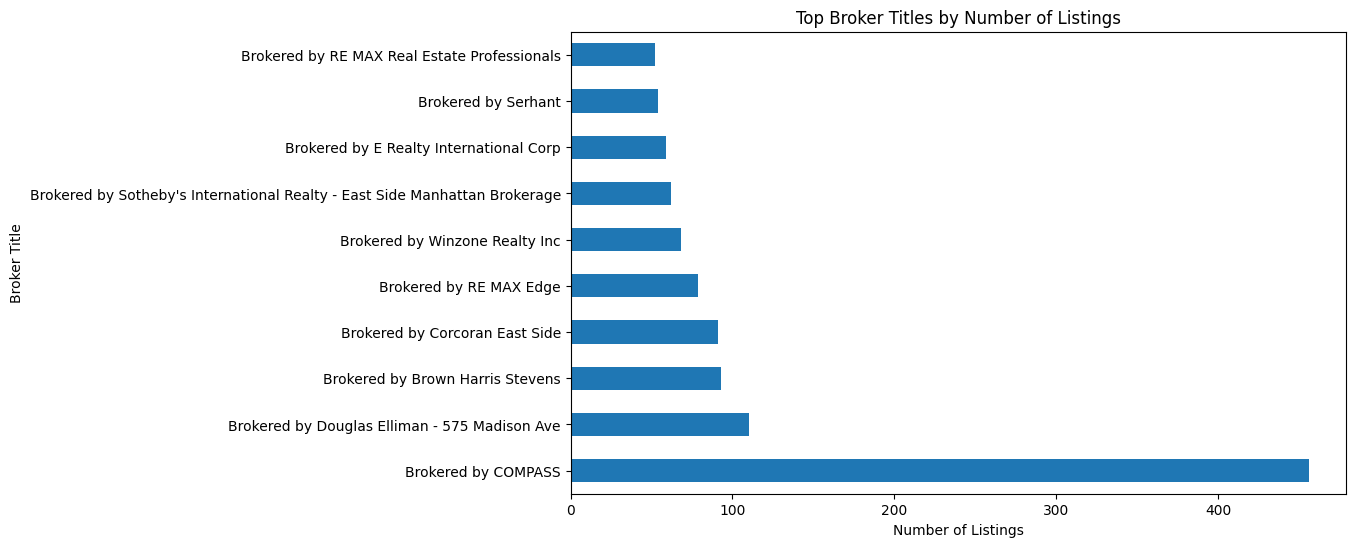

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('NY-House-Dataset.csv')
top_brokers = df['BROKERTITLE'].value_counts().head(10)
print("\nTop Broker Titles by Number of Listings:")
top_brokers.plot(kind='barh', figsize=(10, 6))
plt.title('Top Broker Titles by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Broker Title')
plt.show()


In [9]:
# 2. Distribution of House Prices
price_ranges = pd.cut(df['PRICE'], bins=[0, 500000, 1000000, 1500000, float('inf')],
                      labels=['Below $500K', '$500K - $1M', '$1M - $1.5M', 'Above $1.5M'])
house_price_distribution = price_ranges.value_counts()
print("\nDistribution of House Prices:")
print(house_price_distribution)


Distribution of House Prices:
PRICE
$500K - $1M    1703
Below $500K    1259
Above $1.5M    1156
$1M - $1.5M     683
Name: count, dtype: int64


In [10]:
lowest_avg_price_by_locality = df.groupby(['TYPE', 'LOCALITY'])['PRICE'].mean().reset_index()
lowest_avg_price_by_locality = lowest_avg_price_by_locality.loc[lowest_avg_price_by_locality.groupby('TYPE')['PRICE'].idxmin()]
print("Locality with Lowest Average Price of House by Type:")
print(lowest_avg_price_by_locality)

Locality with Lowest Average Price of House by Type:
                          TYPE         LOCALITY         PRICE
0               Co-op for sale     Bronx County  2.873677e+05
10                 Coming Soon         New York  1.172000e+06
19              Condo for sale  Richmond County  3.982796e+05
22             Condop for sale  New York County  9.820000e+05
26                  Contingent  Richmond County  3.078178e+05
30                    For sale  New York County  1.790227e+06
31                 Foreclosure         New York  6.771650e+05
37              House for sale    Queens County  8.990000e+05
41               Land for sale    United States  1.370000e+05
42       Mobile house for sale         New York  1.288000e+06
47  Multi-family home for sale  Richmond County  1.424694e+06
49                     Pending     Bronx County  3.171333e+05
60          Townhouse for sale  Richmond County  5.499990e+05
